# Chapter 5: Random numbers and Stochastic Simulations
Module 4 of Phys212/Biol212 class
### by Ilya Nemenman, 2016-2020

In this Module, we discuss *probabilistic* models. You need to review section 6.2 in the *Student's Guide*. I may add a few more sections of the book to read here. 

## General notes
In this notebook, we explore stochastic models, including generation of (pseudo)-random numbers and a variety of models and calculations that employ them. In general, all methods involving generation of random numbers are called *Monte Carlo* methods, referring to the Monte Carlo casino in Monaco, arguably the most famos casino in the world. The history of this term is rather curious. As most modern computational methods we use, claculations with random numbers trace their history to the Manhattan project: making the nuclear bomb in Los Alamos, New Mexico, during the second world war. People like von Neumann, Ulam, Metropolis, Bethe, Feynman -- whose names are familiar to everyone who knows even a bit of modern physics or advanced math -- worked there at the time and are responsible for the bulk of early ideas in computational physics. However, this was a secret laboratory, and projects, whether they involved production of fissile materials or development of algorithms, required codenames. The story goes that the name *Monte Carlo* was suggested by Metropolis as a code name for various stochastic models that were developed at the time by von Neumann and Ulam. And the name stuck.

A good introduction to probability theory, one of my favorites, but more on the mathematical side, is in the book  
__[Introduction to Probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/pdf.html)__ by CM Grinstead and JL Snell.
***

## Why do we need random numbers?
Hopefully an answer to this question will become clearer as we progress through this notebook and see a bunch of their applications. However, even now it is useful to break down various problems where random numbers are used into a few geenral classes.

First, some processes are **fundamentally random**. Here I am largely talking about quantum mechanics, where all experimental evidence suggests that the randomness is intrinsic and unavoidable. Second, sometimes we simply do not know enough information about the underlying system, and we choose to model this **absence of knowledge** or as randomness, as well. Third, there are processes that lie somewhere inbetween these two extremes. For example, motion of molecules of air, position of individual bacteria in a single cell tracking experiment, times of interactions of molecules in chemical processes, or times of emission of action potentials by neurons can be described by deterministic Newton's equations. However, these equations give rise to **chaotic** motion (as we discussed in one of the projects in Module 2), which is also not predictable and can be modeled stochastically. Finally, there are some deterministic calculations that are **easier done** using random numbers than using deterministic approaches (e.g., calculating area of a complex object). We will discuss examples of these in subsequent lectures.

>### Your turn 5.1
Think of various physical, chemical, biological processes that involve randomness (e.g., mutations and recombinations in biology, turbulence in physics, and so on) and decide to which of the classes of uses of random numbers deined above they belong.

A good example of a random (or stochastic) process that I find it useful to keep in mind when studying various concepts involved in this module is that of a randomly moving microscopic particle that changes it directions of motion at random times, reorienting itself randomly. Many examples fall under this umbrells. Brownian motion is one. Interestingly, such motion is relevant for living systems too. For example, cells of *E. coli* bacteria also move similarly, reorienting their direction of motion every few seconds once in a while. <font color=pink>Note to self: maybe focus on another example of random walkers.</font> 

## Introducing concepts of randomness
Our introduction here is deliberately a bit sloppy, with no hard mathematical definitions and proofs. Those interested can find them in the textbook I linked.

To define the necessary probabilistic concepts, we need 
 - To define a space of outcomes that a random variable can take (e.g., head or tails, six sides of a dice, etc.). If a random variable is denoted by a small Latin letter, then its space of outcomes is typically denoted by the capital version of the same letter, e.g., $x$ and $X$.
 - Then we define a probability of a certain outcome $x$ as a limit of frequencies after many random draws, or events. That is, if after $N$ draws, the outcome happened $n_x$ times, then it's frequency is $f_x=n_x/N$, and the probability is  $P(x)\equiv P_x=\lim_{N\to\infty}f_x=\lim_{N\to\infty}\frac{n_x}{N}$ (note that we will be using the parentheses and the sub-index notation interchangeably for random variables that have discrete space of possible outcomes).
 
The set of numbers $P(x)$ is known as a *probability distribution* or a *probability distribution function*. Probability distributions satisfy the following properties, which follow from their definition of limits of frequencies:
 - nonnegativity: $P_i\ge0$;
 - unit normalization: $\sum_{i=1}^N P_i=1$;
 - nesting: if $A\subset B$ then $P(A)\le P(B)$;
 - additivity (for non-disjoint events): $P(A\cup B)=P(A)+P(B)-P(A\cap B)$;
 - complementarity $P(not\, A)=1-P(A)$.

### What if we are studying more than one random variable?
Bivariate distributions (a special case of multivariate ones) $P(x,y)$ defined the probability of both events happening. It contains all of the information about the variables, including
 - The marginal distributions: $P(x)=\sum_{y\in Y} P(x,y)$ or $P(y)=\sum_{x\in X} P(x,y)$ 
 - The conditional distributions, which can be defined as $P(y|x)=P(x,y)/P(x)$ or $P(x|y)=P(x,y)/P(y)$, so that the probability of both events is the probability of the first event happening, and then the probability of the second happening given that the first one has happened.
The conditional distributions are related using the Bayes theorem, which says $P(x,y)=P(x|y)P(y)=P(y|x)P(x)$, so that $P(x|y)=\frac{P(y|x)P(x)}{P(y)}$. 

We can now formalize the intuitive concept of dependence among variables. Two random variables are considered to be statistically independent if and only if $P(x,y)=P(x)P(y)$, or, equivalently, $P(x|y)=P(x)$ or $P(y|x)=P(y)$.

### Characterizing probability distributions
Probability distributions are typically characterized by what's known as *expectation values*, or the anticipated averaged of various functions of the random variables. That is, the expectation of $f(x)$ is defined as $E(f(x))=\langle f(x)\rangle=\sum_{x\in X} f(x)P(x)$. Because calculating expectations involves summation, expectation values add, whether for the same or for different variables, so that $E(f(x)+g(x))=E(f(x))+E(g(x))$, $E(f(x)+g(y))=E(f(x))+E(g(y))$. 

Particular expectation values and their combinations are very useful and are used commonly to characterize probability distributions. You probably have seen them in your various lab classes:
 - The mean, which characterzies the center of mass of a distribution: $\mu=\langle x\rangle=\mu$.
 - The variance, which characterizes the spread of the distribution: $\sigma^2=\langle (x-\mu)^2\rangle=\langle x^2\rangle - \langle x\rangle^2$. The square root of the variance, $\sigma$, is known as a standard deviation.
 - The covariance between two variables $c_{xy} = \langle(x-\mu_x)(y-\mu_y)\rangle = \langle xy\rangle - \langle x\rangle \langle y \rangle$. 
 
>### <font color=green>Track 2: Examples of specific discrete random variables</font>
<font color=pink>Note to self: Expand this section by saying something about every specific distribution.</font>
Some discrete probability distributions will appear often in this class, and also in many other cases where you will be studying stochastic processes. We will introduce them here, but will wait to study them for a few lectures, until we return to some of them and figure out how to generate random numbers from these distributions. We will build all of these examples from the simplest case, the coin-toss, also known as the Bernoulli distribution, step-by-step. However, while working with coins, it is useful to keep some physics in mind. A coin coming heads up could be a mutation happening, an action potential generated in a neuron, or a ligand molecule grabbed by a bacterial receptor.
- Bernoulli distribution: $P(0)=q$ is the probability of heads up, and $P(1)=p$ is the probability of heads down, $p+q=1$. $\mu=p$, $\sigma^2=pq$.
- Binomial distribution: the number $n$ of heads out of $N$ trials, $P(n|N,p)={m \choose n}p^nq^{N-n}$. $\mu=Np$, $\sigma^2=Npq$.
- Geometric distribution: the number of trials to the next head, $P(n|p)=pq^{n-1}$. $\mu=1/p$, $\sigma^2=q/p^2$.
- Poisson: the number of heads out of $N$ trials, when the probability of a head is small. This is the $p\to0$, and $pN\to {\rm const}$ limit of the binomial distribution: $P(n|\lambda=pN)= \frac{e^{-\lambda}\lambda^n}{n!}$. $\mu=\lambda$, $\sigma^2=\lambda$.
Again, for all of these distributions we can think of the number of mutations in a bacterium, or the number of spikes produced by a neuron, or a number of molecules captured by a cell.

### Continuous random variables
Some random variables that we discussed were discrete, like heads or tails of a coin toss, or existence or non-existence of a mutation. However, other random variables can be continuous. For example, the heigh of people in the room, or a position of a bacterium in an experiment, or a time to neural action potential -- all of these variables are, in principle, continuous. It makes little sense to ask what is the probability that an individual has *exactly* a certain height; every two people in the room will have the height which is different, if only by a bit. it does make sense, however, to ask what is the probability that the height of a person is close to a certain number $x_0$, within $\Delta x$ from it. Clearly, in the limit of small $\Delta x$, this probability will be proportional to $\Delta x$ itself, $P(x\in[x_0,x_0+\Delta x])=p(x_0)\Delta x$, so that the probability of being in a certain interval is proportional to its length. Thus, having defined the set of possible outcomes of an experiment as a real number, we can define a *probability density*, as a double limit -- a limit of frequencies of observing a certain interval after many independent draws, and the limit of taking the interval size small, $\Delta x\to0$:
$$p(x_0)=\lim_{\Delta x\to\infty}\lim_{N\to\infty}\frac{f_{[x_0,x_0+\Delta x]}}{\Delta x}=\lim_{\Delta x\to\infty}\lim_{N\to\infty}\frac{n_{[x_0,x_0+\Delta x]}}{N\Delta x}.$$
We will denote probability densities by small $p$ and probability distributions by capital $P$ to avoid confusion.

Probability densities satisfy most of the same properties that we discussed for probability distributions. For example, they must normalize to one. The usual summation over possible states now becomes an integral, $\int dx p(x) =1$. One distinction of probabilities is that probability densities can actually be larger than one (as long as they normalize). Joint, marginal, and conditional probability densities can be defines just like probabilities. Expectation values and, in particular, moments can be defined similarly, by replacing summations with integrals.

Additionally, for continuous variables (or more generally, for continuous or discrete ordinal variables), one can define the cumulative distribution, which is the probability that a random draw will be smaller than $x$, $C(x)=\int_{-\infty}^x p(x')dx'$.

>### <font color=green>Track 2: Examples of specific contiuous random variables</font>
<font color=pink>Note to self: expand this section by saying mote about each specific distribution.</font>
Just like for the discrete case, there are some continuous distributions that happen more commonly than others. We introduce them here briefly, and will return to some of them later in the course.
 - Uniform probability density between 0 and $T$. $p(x)=1/T,\; 0\le t\le T$. $\mu_{\rm uni}=T/2, \, \sigma^2_{\rm uni}=\frac{1}{12}T^2$. 
 - Exponential probability density: distribution of time to the next turn even for a randomly moving particle, which has am equal probability to turn at any time. You can think of the exponential density as the limit of the geometric distribution that has very many time steps, and small probability of turning during any particular time step. As a result, we get $p(t)=r e^{-rt}$. One often parameterizes the distribution with $t_0=1/r$ instead of r.  $\mu_{\rm exp}=1/r,\, \sigma^2_{\rm exp}=1/r^2$. Notice also the connection between exponential, uniform, and Poisson random variables: an event that happens at a uniform rate happens with an exponential waiting time between two successive events, and a number of such events in a fixed period of time is Poisson.
 - Finally, taking a Poisson distribution with the large parameter $\lambda$, we see that it starts looking similarly to another probability distribution that many of you have seen before, namely the normal, or the Gaussian distribution: $p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp \left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$ (for the normal distribution resulting from the Poisson, we have a specific relation between the mean and the variance; namely,  $\mu=\sigma^2$.
 - One can also define a multivariate extension of the normal distribution, which we will omit here. 

## Random numbers in Python

Simulations with random variables on a digital, deterministic computer are not trivial. And the first question one should as: How can we even generate random numbers on a computer that is designed to perform deterministic arithmetic operations on binary sequences? In fact, generating random numbers is a much harder task than one may think. Even we, humans, are not good at it. In fact __[you can try it yourself!](http://faculty.rhodes.edu/wetzel/random/mainbody.html)__ 
>### Your Turn
Complete the exercises on the web page linked above. Have you been able to generate good sequences of random numbers?

And yet, stochastic simulations are crucial for many technological, scientific, military, or social applications. Thus scientists, starting with the members of the Manhattan Projects, understanding that generation of true random numbers is impossible on a computer, spent countless hours on developing methods for generation of determnistic *pseudorandom* numbers, that is, sequences of random numbers that can be produced by a deterministic computation, but nonetheless approximate properties of sequences of true independent random numbers. Modern computer systems have really good pseudorandom generators built in them, so that we do not have to worry much about the qualities of random numbers we use. However, this wasn't always the case.  <font color=pink>Note to self: expand by adding anekdotes about poor random number generators and companies selling random numbers.</font>

From now on, I will drop the prefix *pseudo* when discussing generation of random numbers on a digital computer, and it should be understood that **pseudo-random numbers are the only ones we can actually generate**, and we always mean pseudo-random when discussing implementation of stochastic simulations on a computer. As always, in this module we will introduce examples of some of the simplest good pseudorandom number generators, and then revert to using much better ones that are built-in into our Python distribution. Before doing this, however, let's first convince ourselves that Python, indeed, has a good pseudorandom number generator in its disposal. This generator is found in the module `numpy.random`, which we now import as `nprnd`.

In [2]:
#Initialization
import numpy as np
import numpy.random as nprnd   #note the new module we will be using
import matplotlib.pyplot as plt

%matplotlib inline 

>### Your turn
Do `dir(nprnd)` and explore which new functions `nprnd` provides. 

The simplest random numbers that our computers can generate is the uniform *standard* random numbers, where *standard* means that the number is distributed in the interval $[0,1)$. Such numbers $x$ are denoted as $x\sim{\cal U}(1)$. These randoms are generated in Python by `nprnd.random()`. Below are a few examples of using this function. 

[0.47753725 0.34048372 0.12331112 0.44491696 0.06499532]
[0.98048725 0.7948842  0.77946796 0.60922486 0.91666022]
[0.80010633 0.20537263 0.76399342 0.4784894  0.85721315]
[[0.1191006  0.5971725  0.82466364]
 [0.68032156 0.43633094 0.95749585]
 [0.0194494  0.59586293 0.85304057]
 [0.97464649 0.30128214 0.82373174]
 [0.40502185 0.44238871 0.72316626]]


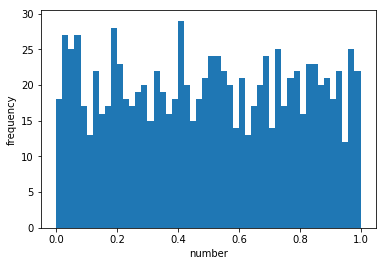

In [8]:
# Examples of random number generation using built-in routines. The r1 variable should be pointing at an  
# array of 5 random numbers. We do the same calls multiple times to illustrate that the numbers are, indeed,
# seeminly random (or rather pseudo-random). Type help(nprnd.random) to understand which arguments are 
# expected by this function. 
r1 = nprnd.random(5)
print(r1)
r1 = nprnd.random(5)
print(r1)
r1 = nprnd.random(5)
print(r1)

# The following command generates a 5x3 matrix of pseudo-random numbers.
r2 = nprnd.random((5, 3))
print(r2)

# Finally, the following command generates n_rand pseudo-random numbers and histograms them into 50 bins,
# illustrating that the numbers we generate are, indeed, uniformely distributed.
n_rands = int(1e3)   # how many random numbers to generate
x = nprnd.random(n_rands)
plt.hist(x, bins=50)
plt.xlabel('number')
plt.ylabel('frequency')
plt.show()

In particular, the code above generate many uniform random numbers and histogrammed them to show that the distribution of the numbers is indeed nearly uniform, safe for random fluctuations.

>### Your turn
Experiment with the parameter `n_rands` in the code above and convince yourself that as it increases, the histogram becomes more and more uniform. 

Most pseudo-random generators fail not because they do not distribute the numbers uniformely in the interval $[0,1)$, but rather because they produce correlations among the generated numbers in a sequence. For example, making a scatter plot of two consecutive generated numbers against each other, $x_{i+1}$ vs $x_i$, may show some structure indicative of dependence. We can plot the pairs of consecutive random numbers from the built-in generator against each other to see that no structure is visible. In reality, the generator used by Python, known as the Mersenne Twister 32 bit generator, as of the writing of these notes has been proven to show no correlations in seqeunces of at least 623 numbers in a row. It has been certified to pass some of the most stringent tests for randomness.

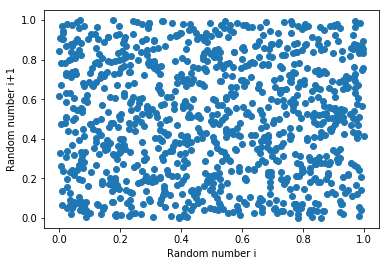

In [9]:
plt.plot(x[0:n_rands-1],x[1:n_rands],'o')
plt.xlabel('Random number i')
plt.ylabel('Random number i+1')
plt.show()

## Simplest generators of random numbers

So how does the Mersenne Twister generator work? We wont' study it specifically, but instead will introduce some general ideas. It turns out that the simplest and the most complex pseudorandom generators work based on more or less similar ideas. Specifically, it turns out that recurrent application of even seemingly trivial rules involving *integer arithmetics* to a positive integer number can generate chaotic sequences (recall the Project from Module 2). That is, if one starts from two even very similar integer numbers (called seeds), such recurrent application quicly starts to produce very different, divergent sequences. Thus unless one knows the seed exactly, one will very quickly loose the ability to predict which number will be the next in the sequence. 

Let's illustrate this idea on a a relatively simple integer arithmetic example, where the next number $x_{n+1}$ is given from $x_n$ by $x_{n+1}=(u*x_n+c)\backslash m$, where $\backslash$ denotes the remaindder of the integer division by $u$, otherwise known as the `modulo` operation. We will call $u$ the mUltiplier, $c$ the inCrement, and $m$ the Modulus. Let's choose $u=17$, $c=1$, and $m=31$. The code below illustrates the first 32 numbers generated using the recurrent application of this operation to two very close seed numbers, 0 and 1.  

In [10]:
u, c, m = 17, 7, 31
seed1, seed2 = 0, 1     # two very close seeds, different by just one bit

x, y = seed1, seed2
for i in np.arange(31):
    x = np.mod(u*x + c, m)   # next value of the operation from one seed
    y = np.mod(u*y + c, m)   # and from the other seed
    print(x,y)

7 24
2 12
10 25
22 29
9 4
5 13
30 11
21 8
23 19
26 20
15 6
14 16
28 0
18 7
3 2
27 10
1 22
24 9
12 5
25 30
29 21
4 23
13 26
11 15
8 14
19 28
20 18
6 3
16 27
0 1
7 24


Note that the sequences diverge immediately. Both of them cycle over all of the 32 numbers between 0 and 31 seemingly randomly, without any percievable order. Here the reason for the apparent randomness is because the modulo operation focuses on the least significant bits in the dividend, which change very quickly because of addition and multiplication. Notice that both sequences start repeating after 31 numbers are produced. This is called the *period* of the generator. Clearly, generators with short periods are not good random number generators. It is also clear that the period cannot be longer than the modulus -- and this is why typically moduli are chosen to be very large.

The example above is an example of one of the simplest random number generators, the **linear congruential generator** (LCG), which can be quite good with good choices of the parameters. Such generators are probably the simplest good generator in use today. There are many others, somewhat better ones, in use today, which produce sequences that have fewer correlation properties. The principal problem with the LCG, and the main reason why more complicated versions exist, is not the quality of the sequences that it generates at good choices of parameters. Rather the problem is that there's a strong dependence of the quality of the sequence on the choice of parameters, and there are very few proofs that guarantee the quality for any specific choice of parameters. Another problem is that an adversary who has a good guess for the multiplier, the increment, and the modulus can crack the generator quite easily and predict what the next number in the sequence will be after observing just a few of the numbers in a seuqnce. This is because the future number depends on just the current number and $u,c,m$, and on nothing else. 

Let's see how easy it is to break the LCG generator above. Below we change the multiplier by just one, to 16, and the generator starts repeating every 5 or 6 numbers, depending on the seed. 

In [11]:
u, c, m = 16, 7, 31
seed1, seed2 = 0, 1     # two very close seeds, different by just one bit

x, y = seed1, seed2
for i in np.arange(31):
    x = np.mod(u*x + c, m)   # next value of the operation from one seed
    y = np.mod(u*y + c, m)   # and from the other seed
    print(x,y)

7 23
26 3
20 24
17 19
0 1
7 23
26 3
20 24
17 19
0 1
7 23
26 3
20 24
17 19
0 1
7 23
26 3
20 24
17 19
0 1
7 23
26 3
20 24
17 19
0 1
7 23
26 3
20 24
17 19
0 1
7 23


Below we implement a good LCG with a long period and no correlations among numbers in a sequence, at least for a small number of numbers (parameters are taken from the Numerical Recipes book). 

In [12]:
# simple linear congruential random number generator
def lcrng(n_rands=1, seed=0, multiplier=1664525,increment=1013904223, modulus=2**31-1):
    # seed,multiplier,modulus, and incrment are the corresponding parameters of the generation
    #   the default values of parameters are one particularly good generator, similar in quality 
    #   to the built-in one.
    # n_rands -- number of random numbers to be generate
    rand_flt = np.zeros(n_rands) # allocate memory for our pseudo-random numbers
    rand_flt[0] = seed           # seed
    for i in np.arange(1, n_rands):  # generate the pseudo-random integres
        rand_flt[i] = np.mod(rand_flt[i-1] * multiplier + increment, modulus)
    
    rand_flt = rand_flt / modulus  # transform the pseudo-random integers into pseudo-random 
                                   # standard uniform numbers
    return rand_flt

Having defined the generator, we can now check that its default version produces correct spread of numbers over the range $[0,1)$ and shows no correlation between the consecutive samples.

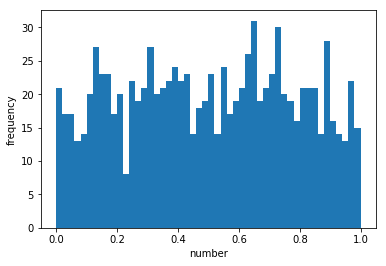

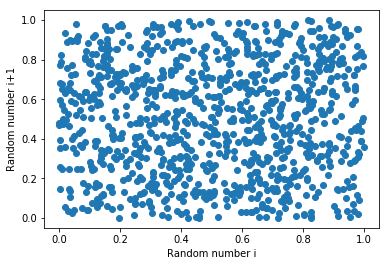

In [13]:
n_rands = 1000 # the number of random numbers to generate
nbins = 50     # number of bins to histogram the random numbers

x = lcrng(n_rands=n_rands)
plt.hist(x, nbins) # show the resulting histogram of random numbers
plt.xlabel('number')
plt.ylabel('frequency')
plt.show()

plt.plot(x[0:n_rands-1],x[1:n_rands],'o')
plt.xlabel('Random number i')
plt.ylabel('Random number i+1')
plt.show()

>### Your turn
Now we can explore how choosing parameters of the linear congruential generator affects its performance. Experiment with the function by trying other (small) values of the modulus, increment, and the multiplier. What happens if the multiplier has common divisers with the modulus? Now make sure to make your own choices, and see what works well and what doesn't. Here's one that is not too good and has a period much shorter than the modulus. Notice the patterns of correlation among consecutive random numbers.

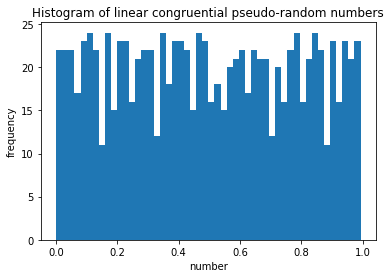

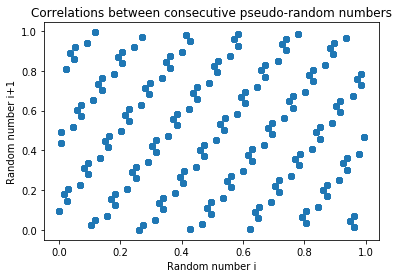

In [14]:
n_rands = 1000  # number of random numbers to be generated
nbins = 50     # number of bins to histogram the random numbers

x = lcrng(seed = 10, multiplier = 77, modulus = 8100, increment = 2, n_rands=n_rands)
plt.hist(x, nbins) # show the resulting histogram of random numbers
plt.xlabel('number')
plt.ylabel('frequency')
plt.title('Histogram of linear congruential pseudo-random numbers')
plt.show()

plt.plot(x[0:n_rands-1],x[1:n_rands],'o')
plt.xlabel('Random number i')
plt.ylabel('Random number i+1')
plt.title('Correlations between consecutive pseudo-random numbers')
plt.show()

>### <font color=green>Track 2: Your turn</font>
The function `lcrng()` has to be re-seeded manually every time you call it, or it will produce the same sequence of numbers again and again. This is not good. Python has a way for a function to remember its state, so that when it is called next time, it is executed from the same point as when it was completed last. This requires replacing `return` by `yield`. Read more about the `yield` command and figure out how to change `lcrng()` to remember its state on the subsequent call.

We finish this section by empahsizing again that modern generators used by Python and other software packages generate much better random sequences than LCG. They have fewer correlations, are robust to the choice of parameters and seeds, and can even generate sequences of random numbers that that have repeated entries, but still very long periods (indeed, sometimes true random numbers *should* repeat). They also are hard to crack. This requires generators that have a much larger state than the LCG generator, which is fully described by its last generated random number. The topic of pseudo-random number generation is exciting, with new results being developed even now, mostly for applications in cryptography. You won't regret it if you explore the subject deeply.

## Examples of using the standard uniform pseudo-random number to generate other types of pseudo-random numbers
Computers only know how to generate ${\cal U}(1)$ random numbers. However, it is relatively easy to use such numbers to generate many different ones.  Here we will study how to generate such different types of random pseudo-numbers using just a standard, uniformly distributed pseudo-random number. I remind you again that I am be omitting the prefix *psuedo* everywhere, calling the numbers we generate just *random*. However, you should keep in mind that the only such numbers we can generate on a deterministic digital computer are pseudo-random, and this is always implied.

>### Your turn 
Make sure to run each cell below multiple times to convince yourself that the generated numbers indeed change.

### Uniform random numbers
The standard linear congruential generator allows us to generate a uniform pseudo-random floating point number between 0 and 1, called the ''standard'' uniform random number. Variables $x$ taken from this generator are denoted as $x\sim{\cal U}(1)$. Then how do we generate a number between, say, $a$ and $b$, to be denoted as $y\sim {\cal U}(a,b)$? For this, we only need to scale and shift the standard number. That is, if we say that $y=a + (b-a)x$, where $x\sim {\cal U}(1)$, then we get $y\sim{\cal U}(a,b)$. The probability density for this number is $P(y) = 1/|b-a|$ when $y\in [a,b)$ and zero otherwise. The code in the next cell illustrates this.

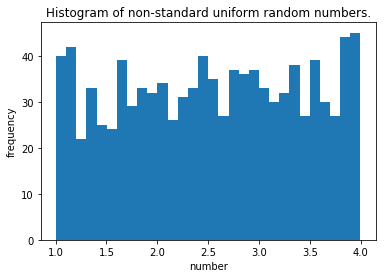

In [15]:
# generating numbers U(a,b)
n_rands = 1000      # number of random numbers to generate
nbins = 30          # number of bins in the histogram to show
a = 1               # left edge of the interval
b = 4               # right edge of the interval
randAB = a+(b-a)*nprnd.random(n_rands)

plt.hist(randAB, nbins)
plt.title('Histogram of non-standard uniform random numbers.')
plt.xlabel('number')
plt.ylabel('frequency')
plt.show()

### Multinomial random number
A dice is an example of a multinomial random number with six equally probable outcomes. In general, a multinomial random variable is a random variable that can have a finite, discrete set of values, with a given probability of each of these values. A binomial random number is a special case of a multinominal random number with only two possible outcomes, such as a coin flip.

We generate multinominal random numbers by sub-dividing the interval between zero and one into subintervals. The number of the sub-intervals is equal to the number of possible outcomes of the multinomial variable, and the length of each sub-interval is equal to the probability of each outcome. We then generate a uniform floating point number between zero and one and check which of the sub-intervals it fell into. The index of the subinterval is then the generated multinomial number. For example, the cell below produces a multinomial random number with 4 possible outcomes, each with the same probability.

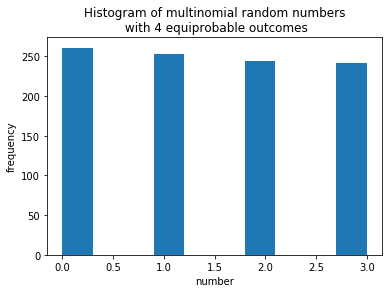

In [16]:
# generating integer randoms 1...4
n_rands = 1000      # number of random numbers to generate
rand4 = np.floor(nprnd.random(n_rands)*4) # we first multiply a standard uniform number by 4, so that it spans 
                    # the range [0,4). Flooring the result produces a number [0,1,2,3] with equal probabilities
plt.hist(rand4)
plt.title('Histogram of multinomial random numbers\n with 4 equiprobable outcomes')
plt.xlabel('number')
plt.ylabel('frequency')
plt.show()

As another example, the cell below simulates a 6-sides dice, but the probabilities of coming up with each of the sides are $(0.2, 0.3, 0.1, 0.15, 0.1, 0.15)$ instead of the uniform $1/6$. Make sure you carefully study the code -- especially how we verify, which of the subintervals the generated numbers fall into.

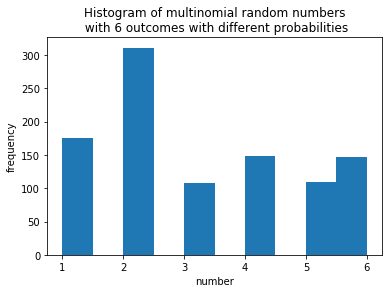

In [17]:
# generating integer 1...6 with nonuniform probabilities 
n_rands = 1000                  # number of random numbers to generate
p1 = .2                         # the following lines specify probabilities for each of the 6 outcomes
p2 = .3
p3 = .1
p4 = .15
p5 = .1
p6 = 1 - p1 - p2 - p3 - p4 - p5 # remember that probabilities must sum up to 1, so the probability of the 
                                # last outcome is defined by the probabilities of the five other ones.

rand6 = nprnd.random(n_rands)   # generating n_rands standard uniform numbers 

# Now we could have iterated over all generated numbers and checked which of the subintervals of [0,1) they 
# fall into. However, recall that vectorized calculations are always much faster, so we vectorize these checks.
rand6 = (rand6 < p1)*1 + ((rand6 >= p1) & (rand6 < p1+p2))*2 + ((rand6 >= p1+p2) & (rand6 < p1+p2+p3))*3 \
        + ((rand6 >= p1+p2+p3) & (rand6 < p1+p2+p3+p4))*4 \
        + ((rand6 >= p1+p2+p3+p4) & (rand6 < p1+p2+p3+p4+p5))*5 \
        + (rand6>1-p6)*6

plt.hist(rand6)
plt.xlabel('number')
plt.ylabel('frequency')
plt.title('Histogram of multinomial random numbers\n with 6 outcomes with different probabilities')
plt.show()

>### Your turn
Look at the histogram above. The bins are not positioned uniformly, and are not centered about the integers $1,\dots,6$. Figure out how to make the figure look nicer.

## Exponential random numbers 
Real-valued variables that have an exponential distribution are also very common. For example, the time between two subsequent nuclear decays, or the time between two nearby spikes in the simplest models of neuronal dynamics is exponentially distributed. Why is that? Nuclear decay has a finite probability $r \Delta t$ of happening in any interval of time $\Delta t$. For the next event to happen at time $T$, it must not happen in all of the $T/\Delta t$ previous windows of the width $\Delta t$, and then it should happen in the window $[T,T+\Delta t)$. Combining these, we get the probability of the next event in the interval $[T,T+\Delta t)$ being equal to $P_{\rm next event}(T:T+dt)=(1-r \Delta t)^{T/\Delta t}r \Delta t\to e^{-r T}r \Delta t$, so that the probability *density* is $P_{\rm next event}(T)=r e^{-\rho T}$ (here we used the, so called, *first remarkable limit*; make sure you can do this calculation). More generally, a random variable $x$ is called exponentially distributed with the *mean* $x_0$ (or the *rate* $r=1/x_0$) if the probability density function for this variable obeys $P(x)=\frac{1}{x_0} e^{-x/x_0}$. We denote such variables as $x\sim {\cal E}(x_0)$. The distribution with $x_0=1/r=1$ is called the *standard* exponential distribution, denoted as $x\sim{\cal E}(1)$. 

Numerical generation of exponential random numbers illustrates a few important properties of probability distributions. First of all, if we have an access to a standard exponential random number, then by just multiplying it by $x_0$ we will get the exponentially distributed number with a mean of $x_0$. That is, ${\cal E}(x_0)=x_0{\cal E}(1)$. This means that we only need to figure out how to generate standard exponential numbers, and the rest can be obtained by a simple multiplication. 

<font color="pink">Note to self: Figure is needed here</font>
In its turn, for generation of standard exponential numbers, let's go back to our definition of the probability densitiy of a continuous random variable as a limit of an ever-finer discretization of probabilities of observing the variable in segments of the real axis. Suppose we have a real valued variable $x$, which is distributed according to $P(x)$. This means that the probability of having a sample land in the interval $[x,x+\Delta x)$ tends to $P(x)\Delta x$. Suppose now we have defined a new variable $y=y(x)$. We can invert the functional dependence and write $x=x(y)$ (note that we are now assuming that such inverse function exists!) Of course, $y$ is also a random variable. How is it distributed? We note that the probability of a sample to land in our interval should not depend on whether we marked its end points as $[x,x+\Delta x)$, or as $[y(x),y(x+\Delta x))\approx [y(x),y(x) + dy/dx \Delta x)$. In other words, $P(x)|\Delta x|=P(y)|\Delta y|$, where we added the absolute value signs to ensure that, even if an interval is negative (is read from right to left), the probability is still positive. This gives, in the limit of small $\Delta x$, $P(y) = P(x(y))\left|\frac{dx}{dy}\right|$.

How does this help with generating exponential numbers? Suppose that $x$ is a standard uniform number, $x\sim {\cal U}(1)$, so that $P(x)=1$. Let's choose $y=-\log x$, resulting in $x= e^{-y}$. Then $P(y)=P(x(y))\left|\frac{d e^{-y}}{dy}\right|=e^{-y}$. In other words, the variable $y$ is a random standard exponential variable, $y\sim {\cal E}(1)! So generating samples of such random variables is easy -- just generate standard uniform random numbers and take the negative log of them. 

Below we implement such generation of standard exponential random numbers and compare with the built-in function for their generation, `nprnd.exponential()`. For this, first, we generate exponential random numbers using the built-in function. Second, we compare the built-in functio to our own generator. We also do the comparison on the semi-log plot to illustrate that the numbers in both cases are, indeed, exponentially distributed. The built-in and log-uniform are indistinguishable. Maybe this should not be surprising since, under the hood, the built-in function generates the random numbers in exactly the same way as our own! 

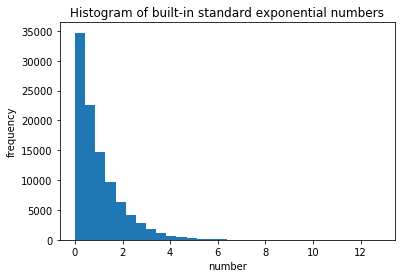

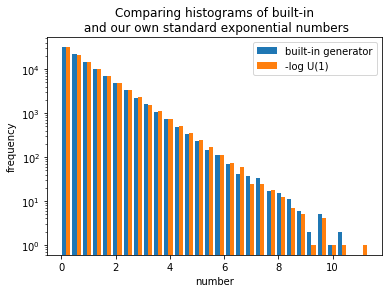

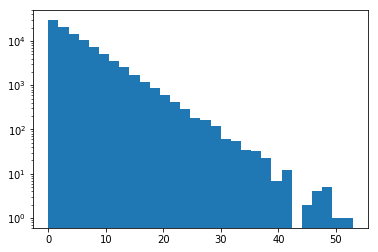

In [18]:
n_rands=int(1e5)
# First, we generate exponential random numbers using the built-in function.
plt.hist(nprnd.exponential(size=n_rands), 30)
plt.xlabel('number')
plt.ylabel('frequency')
plt.title('Histogram of built-in standard exponential numbers')
plt.show()

# Second, we compare the built-in function to our own generator. We also do the comparison on the semi-log plot
# to illustrate that the bumbers are, indeed, exponentially distributed. 
plt.hist([nprnd.exponential(size=n_rands), -np.log(nprnd.random(n_rands))], 30,log=True)
plt.xlabel('number')
plt.ylabel('frequency')
plt.title('Comparing histograms of built-in\n and our own standard exponential numbers')
plt.legend(('built-in generator', '-log U(1)'))
plt.show()

plt.hist(-5.0*np.log(nprnd.random(n_rands)), 30,log=True)
plt.show()

## A uniform random number in a circle
Let's suppose we need a uniform random number in a circle around $(0,0)$ with a radius of 1. This is not a trivial problem -- and, in fact, some of consulting and data science companies use this during interviews. We will explore multiple different ways of generating such numbers. First read the methods and ask yourself: Which of these will work? Which of these will be the fastest? Then we will look at implementations and see if your guesses were correct.

**First plausible method**: We will generate a random $x$ coordinate and a random $y$ coordinate. We will combine the two to fine the angle defined by them. We will then generate a uniform radius between 0 and 1, and we will put the point at this radius and at the chosen angle. 

**Second plausible method**: We generate the random radius and the angle directly, and generate $x$ and $y$ pairs directly from the angle and the radius.

**Third plausible method**: This is similar to the second, except that the random variable we generate is $r^2$, not $r$, and we then calculate the distance to the point by taking a square root of the pseudo-random generated number.

**Fourth plausible method**: We generate a random $x$ coordinate between $(-1,1)$, and the same range for the $y$ coordinate. We then reject all of the points that fell outside the unit circle. In this case, we do not know how many pairs of points to generate precisely, because we do not know how many will be rejected. So we make an estimate: the area of a square is 4; the area of the unit circle is $\pi$. So if i want to generate $\mbox{n_nands}$ points, I should generate instead about $4 \mbox{n_rands}/pi$. I then check how many actually got generated, and if not enough were, then I request the missing number to be generated additionally. This is *not* the fastest way to implement the rejection method (we will discuss this a bit later), but probably the cutest: the function we write for generating numbers on a circle calls itself *recursively* if it needs to generate the missing numbers.
<font color="pink">Note to self: Need an explanation of scoped for recurrent calls here. Figure would be useful.</font>

Once you have thought about these method, run the cell below. 

In [ ]:
n_rands = int(1e3)
x = 2*nprnd.random(n_rands) - 1      # generate random x between -1 and 1
y = 2*nprnd.random(n_rands) - 1      # generate random y between -1 and 1
distance = np.sqrt(x**2+y**2)        # calculate the distance the points are away from (0,0)
r = nprnd.random(n_rands)            # generating random distance from the center
x = x/distance*r     # These two lines keep the angle defined by (x,y) and move the 
y = y/distance*r     # point to the radius defined by the variable r.
plt.plot(x, y, 'o')
plt.title('Putative random numbers on a circle: Method 1')
plt.show()


r = nprnd.random(n_rands)            # generate random distance from the center between 0 and 1
phi = 2*np.pi*nprnd.random(n_rands)  # generate random angle between 0 and 2*pi
x = r*np.cos(phi)                    # calculate x
y = r*np.sin(phi)                    # calculate y
plt.plot(x, y, 'o')
plt.title('Putative random numbers on a circle: Method 2')
plt.show()

r2 = nprnd.random(n_rands)           # generate random distance to the center, squared
phi = 2*np.pi*nprnd.random(n_rands)  # generate random angle
r = np.sqrt(r2)                      # generate r from r^2
x = r*np.cos(phi)                    # x is the cosine projection of (r,phi)
y = r*np.sin(phi)                    # y is the sine projection of (r,phi)
plt.plot(x, y, 'o')
plt.title('Putative random numbers on a circle: Method 3')
plt.show()

# Because generating numbers using Method 4 is a bit complicated, we first 
# define a function for this, and will then call the function later for the
# actual generation.
def rnd_circle_rejection(n_rands):
    N = int(np.ceil(4/np.pi*n_rands)) # need to generate more points because of possible rejections.
                # Note that np.ceil makes its argument a double precision number, which just happens to be
                # an integer. We need to actually make it an integer type, hence int()
    x = 2*nprnd.random(N) - 1         # generate random x
    y = 2*nprnd.random(N) - 1         # generate random y
    ind = (x**2+y**2 < 1)             # which points fall in the circle?
    x = x[ind]                        # choose x of points inside the circle
    y = y[ind]                        # choose y of points inside the circle
    print('Generated ', np.size(x), ' random numbers.',sep='') # we do not need this, and you should feel 
                # free to remove this line.
                # I put it here so that you can see how additional data points get generated if we rejected
                # too many numbers initially
    if (np.size(x)<n_rands):          # if insufficient number of points got generated (i.e., too many were 
                                      # rejected) 
        x1, y1 = rnd_circle_rejection(n_rands-np.size(x)) # generate more points recursively
        x = np.hstack((x,x1))         # stack the originally generated ones and the new ones together
        y = np.hstack((y,y1))
        
    if(np.size(x)>n_rands):           # if too many points were generated originally,
        x = x[0:n_rands]              # then truncate the arrays to the needed size
        y = y[0:n_rands]
    
    return x, y                       # return the x and y coordinated

x,y = rnd_circle_rejection(n_rands)   # now let's actually generate the numbers 
plt.plot(x, y, 'o')
plt.title('Putative random numbers on a circle: Method 4')
plt.show()

Which one of the generators is correct? 

The first method generates a cross of higher density at $\pm 45^{\rm o}$ angle. This is easy to understand: the rays that extend in these directions are longer than in all others, and, in particular, $\sqrt{2}$ longer than in the horizontal and the vertical directions. Thus we generate more points along these diagonal rays, which, in turn, transforms into a higher density once we pull these numbers first onto the rim of the circle, and then spread them over the whole area of the circle. 

Hopefully you also see that the first two of the tried methods generate too many points at the center of the circle compared to the edges. Those of you who know multivariate calculus should be able to extend the calculation we did for generation of exponential random numbers to the multivariate case and relate the higher density of points near the center of the circle to the Jacobian of the transformation we make when we generate such two-dimensional random numbers from uniform standard numbers by transforming from the $(x,y)$ coordinates to $(r,\phi)$ ones. One can also reason this without the more advanced math. By generating a uniform random $r$, we are putting the same number of points at $0\le r<0.5$ as at $0.5\le r<1$. But the area inside the circle of the radius $0.5$ is $\pi/4$, while the area of the annulus of the width of $0.5$ and the external radius of $1$ is $3\pi/4$. In other words, the density of points generated using a uniform random $r$ is 4 times as high in the inner circle as it is in the annulus, and this is what you see in the figures.   

> ### Your work
> Time how long it takes each of the generators to generate $10^6$ points in a circle. Which one is faster? (Focus only on *Methods 3, 4*, because the first two are incorrect. In general, performing complex arithmetic operations (trigonometric functions and roots) takes time, slowing down *Method 3*. On the other hand, memory management in *Method 4*, and specifically recursive calls to the function, as well as creating arrays and then stacking them to produce the final output, is also costly. Which of the methods won in your case? Now write an even faster method, which simply generates a bit too many points to start with, so that it almost never has to do the recursive calls. Suprisingly, even though this is wasteful (we generate and then throw away potentially many numbers), as long as it is not too wasteful, such method will be the fastest. *Note: it only takes a few small changes to the function `rnd_circle_rejection()` to implement this.*

## Generating a standard normal number 
A Gaussian (or normal) random variable is a variable with the probability density function $P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp \left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$. $\mu</math$ is called the *mean*, and $\sigma$ is called the *standard deviation*. One denotes a variable sampled from this distribution as $x\sim {\cal N}(\mu,
\sigma^2)$. This is the familiar bell-shaped distribution centered around $\mu$ with the width of $\sigma$. The standard normal distribution has $\mu=0$ and $\sigma^2=1$. Clearly, if one can generate a standard normal random variable, one can get a more general normal variable from it by multiplying by $\sigma$ and shifting by $\mu$. In other words, ${\cal N}(\mu,\sigma^2)=\mu + \sigma {\cal N}(0,1)$. So we only need to figure out how to generate a standard normal variable.

While we will skip the details, the generation of a random variable on a circle hints how to generate such standard random variables easily. First, imagine that I generate not one, but a pair of standard random normal variables $(x,y)$. Then $r^2=x^2+y^2$, and $P(x,y)=  \frac{1}{2\pi}\exp \left(-\frac{x^2+y^2}{2}\right)=\frac{1}{2\pi}\exp \left(-\frac{r^2}{2}\right)$. Thus the radius-squared is exponentially distributed. So maybe if one should generate a random angle $\phi$ between 0 and $2\pi$ and a random standard-exponential distributed variable, which one views as $r^2/2$. Then mulitplying it by 2, taking its square root and choosing $x=\sqrt{r^2}\cos \phi$ and $y=\sqrt{r^2}\sin \phi$ generates a pair of random standard normal samples. The code uploaded with this module compares this method against the built-in `nprnd.randn()` function provided by Python for generation of Gaussian numbers.
 
Some of you may wonder if one can do something simpler and instead generate a standard normal variable as $\frac{x^2}{2}\sim {\cal E}(1)$ (standard exponential), and then multiplying by 2 and taking the square root. This is a bit complicated, and requires a good course in multivariable calculus to understand the details, but the upshot is that it won't work for the same reason why we needed to generate a random $r^2$ instead of a random $r$ when generating random points on a circle: the Jacobian of a transformation is missing. In fact, there is no way to generate a normal variable from a standard uniform variable by a simple reparameterization. The easiest way of convincing oneself of this is to try and show that it won't work. We do this below. Clearly, the approach does not work. 

In [ ]:
# generating Gaussian random numbers using built-in function
n_rands = int(1e5)    # how many numbers to generate?
nbins = 30            # how many bins to histrogram into?
plt.hist(nprnd.randn(n_rands), nbins) # make sure to explore help(nprnd.randn)
plt.title('Built-in normal random numbers generation')
plt.show()

# and comparing built-in to our own generator
phi = 2 * np.pi * nprnd.random(n_rands) # generating a random angle
r = np.sqrt(2 * nprnd.exponential(size=n_rands)) # generating a random exponentially distributed r^2, 
                # multiplying by 2, and taking a square root to get the correctly distributed r
rand_norm = r * np.cos(phi) # the x projection of this (x,y) pair is standard-normal distributed, and we 
                # discard the y projection for now
plt.hist([nprnd.randn(n_rands), rand_norm], nbins)
plt.title('Comparing built-in in our own normal random numbers')
plt.legend(('built-in normal\n random numbers', 'our normal\n random numbers'))
plt.show()

# Now we show that generating just a single x instead of the (x,y) pair doesn't give us the right distribution
x = np.sqrt(2 * nprnd.exponential(size=n_rands)) # we do the same as above, but generate x as a square root of x^2,
                # rather than r as a square root of r^2
si = np.round(nprnd.rand(n_rands))*2 - 1 # this generates a random sign for x -- some will be +1 and some will be -1
x = x*si        # this is finally our putative standard normal
plt.hist(x, nbins)
plt.title('Incorrectly generated normal random numbers')
plt.show()

## Using random numbers for Monte-Carlo (MC) calculations
We use random numbers to perform computations that are fundamentally random, and we will focus on those in the upcoming weeks. However, as we discussed a few lectures ago, there are computations that are fundamentally deterministic, but may be easier to perform with random numbers. One of these is calculation of areas under the curve (definite integrals), known as Monte Carlo integration.

Suppose we want to calculate the areas under a curve $y=y(x)$, with the limits $x\in [a,b]$. We can, of course, do this analytically for some functions $y$ or numerically by subdividing the range of $x$ into small segments $\Delta x$ and adding up the areas of all small rectangles, $y(x)\times \Delta x$. An alternative (and dare I say, more fun?) way is as follows. Suppose we know that $y(x)$ is positive and smaller than $f_{\rm max}$. Then the area under the curve can be written down as $(b-a)f_{\rm max}\alpha$, where $\alpha$ is the fraction of the rectange $b-a$ by $f_{\rm max}$ that is actually under the curve. How do we estimate this fraction? Suppose I generate random points (dart throws), uniformly distributed over the rectangle $b-a$ by $f_{\rm max}$. The fraction of those that end up under the curve (and it's easy to check which ones do!) is an estimate of $\alpha$. The next cell performs such calculation for an arbitrary $y=y(x)$. Note that our implementation is incomplete: we don't check if the function is ever below 0 or is ever above $f_{\rm max}$, which a better implementation should do. We will address this later.

The implementation below first defines the function that will be integrated. You can plug different expression there, to get integrals of different functions. Then we define the MC integrator itself. Finally we integrate the function using the integrator.

In [ ]:
# a function to integrate using the Monte Carlo approach
def to_integr(x):
    return x**2
    #return np.exp(np.sin(x))

# Monte Carlo integrator
def mc_integr(func, a, b, fmax, N):
    # func -- function to integrate
    # a,b -- the x range of the integration
    # fmax -- the maximum value of the integrand
    # N -- number of random samples used for the integration
    # return -- a real number, estimate of the area
    N = int(N)                  # just making sure that the number of dart throws is integer
    x = a+(b-a)*nprnd.random(N) # generating random x coordinated
    y = fmax*nprnd.random(N)    # generating random y coordinate
    counts_under_curve = np.sum(y <= func(x)) # how many dots under the curve?
    frac_under_curve = counts_under_curve/N   # what is the fraction of dots under the curve?
    area = (b-a)*fmax*frac_under_curve        # estimate of the area
    return area

# calculating area under the function to_integr using MC integrator
area = mc_integr(to_integr, 0, 1, 3, 100000)
print('Estimate of the area is ', area, '.', sep='')

Above we integrated the function $x^2$ between 0 and 1. The integral should be $1/3$ -- and hopefully after running the cell above, you got a value very close to $1/3$.  

>### Your work
Harden the function `mc_integr()` to be able to handle various user errors. First, expand the function to allow areas under the curve to be negative (this will require you to also have an `fmin` argument, in addition to `fmax`). Second, check if any values of `to_integr(x)` generated in the process of integration fall outside of the range $[f_{\rm min}, f_{\rm max}]$. If they do, then expand the range appropriately. Return not just the estimate of the area, but the estimates of $f_{\rm min}$ and $f_{\rm max}$ as well.

## What is the error of MC methods?
The result of the area calculation above came out to be slightly different from $1/3$. Herewithin lies the problem of MC approaches: they are probabilistic, and every time we perform them, the results are different. But how different? We can verify, first of all, that our probabilistic estimate of the area converges to to true one as the number of random samples increases, $N\to\infty$ (at least when the true value of the area is known, e.g., when we integrate a function $x^2$). In fact, one can can convince onself that this should be the case rather easily if the numbers are truly uniformley distributed in the rectangle around the curve. 

Can we additionally understand how quickly the convergence happens? For this, we can explore the distribution of the estimates of the area when we perform the calculation with a varying number $N$ of dart throws. That is, we can generate many different estimates with different realizations of $N$ dart throws and see how different they are from each other. The cell below does precisely this. Hopefully you will see that the larger $N$ is, the more concentrated the estimates are. We quantify this decrease of the spread by calculating the standard deviation $\sigma$ of the  estimates calculated at the same value of $N$. We then compare the standard deviations to the $\sigma = 1/\sqrt{N}$ line.

In [ ]:
# investigating the dependence of the accuracy of the MC integrator
# on the number of samples
n_trials = 30            # number of area estimates for each N
N = np.logspace(1, 5, 9) # different values of N to be used
areaN = np.zeros((N.size, n_trials)) # array to store all of the estimated area values

# for each N and each trial within a fixed value of N, calculate and store the area
for i in np.arange(N.size):
    for j in np.arange(n_trials):
        areaN[i, j] = mc_integr(to_integr, 0, 1, 3, N[i])


# plotting areas as a function of N
plt.semilogx(N, areaN, 'o')
plt.xlabel('N')
plt.ylabel('area')
plt.title('Estimated of the area vs. N')
plt.show()

# plotting the standard deviation of the area estimates as a function of N
# and comparing to 1/sqrt(N)
plt.loglog(N, np.std(areaN, 1), 'o')
plt.loglog(N, 1/np.sqrt(N))
plt.xlabel('N')
plt.ylabel('standard deviation of the area')
plt.title('Standard deviation of MC estimates of the area vs. N')
plt.legend(('results of simulations', '1/sqrt(N) line'))
plt.show()

Notice how the convergence of the estimators to their true value (the decrease of the standard deviation) goes as $\sigma = A/\sqrt{N}$, where $A$ is some constant. The general claim, which is known as the *Central Limit Theorem* is that the $1/\sqrt{N}$ law holds true for essentially any function being integrated, and only the constant $A$ changes. Moreover, the same scaling is true for almost all simple MC methods, beyond just area estimation: you need to increase the number of smaples by a factor of 100 to get a 10-fold increase in precision. 

>### Your work
Verify that MC integration of different function still converges as $\sigma=A/\sqrt{N}$. For this, integrate different functions you can think about. Think about how $A$ depends on the shape of the function being integrated. Suppose you overestimated $f_{\rm max}$. How would this change $A$? 



## Random walks and the Central Limit Theorem
Every one of you who has taken any science lab can probably recall some mention of the Gaussian (also known as normal) distribution: in many experiments, the stochastic fluctuations around the mean are suppsed to be distributed according to the familiar bell-shaped curve, defined by two parameters: the mean $\mu$ and the standard deviation $\sigma$, namely: $P(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$, shown in the next cell.

>### Your Turn
Vary the mean and the standard deviation, and explore how the distribution changes. Show many different normal distribution on the same axes.

In [ ]:
sigma = 1.0   # standard deviation
mu = 1.0      # mean
x = np.arange(-5,5,0.1)
y = 1/np.sqrt(2*np.pi*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Normal distribution')
plt.show()

Why were your instructors so confident that the distribution of errors is Gaussian? To understand this, we will start from afar, from random walks.

Random walks is probably my favorite subject in the modern physics curriculum. Many of the famous names in the late nineteenth and early twentieth century physics and math have contributed to the field, including Einstein, Polya, Wiener, and many others. A single lecture cannot do justice to the subject, and I hope you will pick some of the books to read instead. The 
__[Introduction to Probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/pdf.html)__ by Grinstead and Snell is a good starting point. Another great book is __[Random Walks in Biology](https://www.amazon.com/Random-Walks-Biology-Howard-1993-09-07/dp/B01MQZYDZ4)__ by Howard Berg. 

In general, **random walk** is *a stochastic process that consists of a succession of random steps*. The usual and overused analogy is that of a drunkard, who tries to walk, falls, stands up, and, having forgotten which way he came from, chooses a random direction to go to, before falling again and repeating the cycle. There are many different types of random walks. *Discrete time* (DT) walks mean that every step takes a discrete unit of time. In contrast, in *continuous time* (CT) walks, the duration of each step is a real-values variable, sampled from some distribution. Similarly, one can define *discrete space* (DS) or *continuous space* (CS) random walks by whether the step length is fixed or sampled at random from some probability distribution. As we will see later in this lecture details of these probability distributions matter very little (as long as they have finite variances of their own), and we can learn a lot about many different random walks by studying the simplest version of a random walk, the DSDT walk with the duration of a step $\Delta t=1$ and the step size $a=1$. Such walks can exist in any number of dimensions (with 1-d being, of course, the simplest). However, for illustration purposes, below we will mostly focus on 2-d walks on a square lattice, where the walker at any point in time can move in one of four directions: up, down, left, or right. Let's generate a few such walks of different lengths.

In [ ]:
# This function will generate a 2d DSDT random walk
def DSDT_2d_walk(N):
    # Input:
    #   N - duration of the walk
    # Return:
    #   x,y -- arrays of length N, coordinates of the walker on every step
    
    directions = np.floor(nprnd.random(N)*4) # (0,1,2,3) directions of motion on each time step
    # Do you understand why multiplication by 1.0 is needed in the next two lines?
    # Check what happens if this multiplication is removed.
    dx = (directions == 0) - 1.0*(directions == 1)  # directions == 0/1 corresponds to right/left motion
    dy = (directions == 2) - 1.0*(directions == 3)  # directions == 2/3 corresponds to top/down motion
    
    x = np.cumsum(np.hstack((0,dx)))       # x and y coordinates of the walker are a cumulative sum of steps
    y = np.cumsum(np.hstack((0,dy)))       # Notice that the initial position of the walker is always 0. 
        # Also notice that the walk of N steps has N+1 positions in it -- there is the initial and the final
        # position, surrounding N steps.
   
    return x, y


N = np.array((100, 1000, 10000))    # we will explore random walks of these different lengths
for i in np.arange(N.size):
    x, y = DSDT_2d_walk (N[i])
    plt.plot(x, y, 'b-o')
    plt.title('Random Walk of length ' +  str(N[i]))
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.show()

Notice how a moving particle comes back again and again, and how random walk eventually covers almost the entire 2-d space, with very few holes in the middle. This is a crucial property of random walks, which we will refer to again in one of the projects for this Module.

>### Verification
To verify that the function generates random walks correctly, generate very short walks, e.g., `N=4...10`  and see if the walker makes any unallowed steps visually. 

>### Your turn
Run the cells multiple times and convince yourself that the walks are not biased. Sometimes they move more to one side or the other, but other times it's the opposite.

We can now see that the details of how the individual steps are generated in a walk matter much less than one might naively think. For this, we define a CSDT walk, where in each individual step, the walked moves in both $x$ and $y$ directions by steps of sizes taken from ${\cal U}(0,2^{1/4})$. We then compare the DS and the CS walks to each other. 

Note the weird $(3/2)^{1/2}$ multiplier. We do this to ensure that the average steps we take in each of the walks are equal. Indeed, for CSDT walk, the steps, on average, are smaller than 1, but we make steps in both the $x$ and the $y$ direction always. The algrebra is a bit more complex than I want to go over here, but I hope the logic is clear; we will return to this multiplier later.

In [ ]:
# This function will generate a 2d CSDT random walk with steps taken from the uniform distribution
def CSDT_2d_walk(N):
    # Input:
    #   N - duration of the walk
    # Return:
    #   x,y -- arrays of length N, coordinates of the walker on every step
    
    dx = (3/2)**(1/2)*(2*nprnd.random(N) - 1) # displacements along x
    dy = (3/2)**(1/2)*(2*nprnd.random(N) - 1) # displacements along y
    
    x = np.cumsum(np.hstack((0,dx)))       # x and y coordinates of the walker are a cumulative sum of steps
    y = np.cumsum(np.hstack((0,dy)))       # Notice that the initial position of the walker is always 0. 
        # Also notice that the walk of N steps has N+1 positions in it -- there is the initial and the final
        # position, surrounding N steps.

    return x, y# comparing different ways of generating random walks


N = np.array((100, 1000, 10000))    # we will explore random walks of these different lengths
for i in np.arange(N.size):
    xD, yD = DSDT_2d_walk (N[i])    # discrete walk of this length
    xC, yC = CSDT_2d_walk (N[i])    # continuous walk of this length
    plt.plot(xD, yD, 'b-')
    plt.plot(xC, yC, 'r-')
    plt.title('Different types of Random Walks of length ' +  str(N[i]))
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.legend(('DSDT walk', 'CSDT walk'))
    plt.show()

Notice that we can easily see the difference between the two walks when there are only a few steps, and the walks do not move far away from the origin. However, at $N=10000$, when individual steps are invisible, it would be hard to distinguish one walk from the other. 

To formalize this observation, we will look at the means and the variances of displacements in walkers of different types. For this, we will generate many different walks of the same type and the same length and average.

In [ ]:
N = 10000        # length of a walk
N_walks = 5000   # number of walks for averaging
xD = np.zeros((N_walks,N+1)) # the x coordinates of the N_walks walks of length N, DSDT walk
yD = np.zeros((N_walks,N+1)) # the y coordinates of the N_walks walks of length N, DSDT walk
xC = np.zeros((N_walks,N+1)) # the x coordinates of the N_walks walks of length N, CSDT walk
yC = np.zeros((N_walks,N+1)) # the y coordinates of the N_walks walks of length N, CSDT walk

for i in np.arange(N_walks):
    xD[i,:], yD[i,:] = DSDT_2d_walk(N)   # generate a DSDT walk
    xC[i,:], yC[i,:] = CSDT_2d_walk(N)   # generate a DSDT walk

# mean x and y positions of both types of walks
mean_xD = np.mean(xD, 0)
mean_yD = np.mean(yD, 0)
mean_xC = np.mean(xC, 0)
mean_yC = np.mean(yC, 0)

plt.plot(mean_xD, 'b-')
plt.plot(mean_xC, 'r-')
plt.title('Mean x displacements for different walks of length ' +  str(N))
plt.xlabel('time')
plt.ylabel('x coordinate')
plt.legend(('DSDT walk', 'CSDT walk'))
plt.show()

plt.plot(mean_yD, 'b-')
plt.plot(mean_yC, 'r-')
plt.title('Mean y displacements for different walks of length ' +  str(N))
plt.xlabel('time')
plt.ylabel('y coordinate')
plt.legend(('DSDT walk', 'CSDT walk'))
plt.show()

Note that, in the example above, we make $N=10^4$ steps, and the mean $x$ and $y$ displacements for 5000 random walks are on the order of about only 1 even at the very end of the time interval. This is relatively very small, and probably consistent with the displacement actually being zero, on average.

>### Your turn
Run the cells above with larger $N$ and convince yourself that the mean $x$ and $y$ displacements decrease as $N\to\infty$.

So, both CS and DS walks result in the zero mean displacement. Let's now look at what's known as the *mean squared displacement* (which, for the unbiased walks like we are dealing with is equivalent to the walk variance), ${\rm MSD}= \left<x^2+y^2\right>$, where $\left<\dots\right>$ denotes averaging over realizations. 

In [ ]:
mean_R2D = np.mean(xD**2 + yD**2, 0)   # MSD for DS walk
mean_R2C = np.mean(xC**2 + yC**2, 0)   # MSD for CS walk 

plt.plot(mean_R2D, 'b-')
plt.plot(mean_R2C, 'r-')
plt.plot(np.arange(N+1), 'g:')
plt.title('Mean squared displacements for different walks of length ' +  str(N))
plt.xlabel('time')
plt.ylabel('MSD')
plt.legend(('DSDT walk', 'CSDT walk', 'MSD=time'))
plt.show()

Both of the walks have the same MSDs! And both of the MSDs grow linearly with time. In fact, this is the crucial property of random walks: mean squared displacement grows linearly with time. Irrespective of the type of the walk and the distributions of individual steps (provided those have finite variances), we will always get this scaling. 

>### Verification
In fact, the linear scaling of the walk variance (MSD) can be used for verification of computational models of random walks. Let's denote by $\sigma^2_1$ the variance of a single step of the walk. Then the variance after $T$ steps is $\sigma^2_T= T\sigma^2_1$. If the computational model gives a different result, it is wrong.

>### Your turn
Derive the factor of $(3/2)^{1/2}$ used in the generation of the CSDT random walk above.

Processes that have the linear scaling of the MSD with time are called *diffusive* processes. They include different random walks, Brownian motion, diffusion per se, and many others. One way to think about diffusion is a limit of a CTCS random walk with finite variances of durations and lengths of jumps, when the mean duration and length go to zero, and the number of steps goes to infinite in such a proportion that the MSD stays linear with time, $${\rm MSD}=2dDT,$$ where $d$ is the dimensionality of the process, $T$ is its overall duration, and $D$ is what's called the *diffusion coefficient*, defined by the expression above.

>### Your turn
Generate either a CSDT random walk where the distribution of step sizes is exponential, or the DSCT walk where distribution of time steps is exponential and show that the same linear scaling of the MSD is observed. 

## Central Limit Theorem
Now we are well positioned to answer the original question we started this lecture from: why are distributions of experimental errors Gaussian? Well, errors usually are contributed to by many independent processes that describe irreproducibility of steps taken by the experimentalist and irreproducibility of the conditions that the system experimented on is in. None of the processes dominates the others, and so each produces small contributions, which collectively result in a big effect. Random walks model this: there are many individual steps, each of which is small, but collectively they result in a big displacement. So what is the distribution of displacements in a random walk? To study this, we plot the distribution of $x$ positionsof our CS and DS walkers.

In [ ]:
plt.hist([xD[:,-1],xC[:,-1]],nbins)
plt.xlabel('x position')
plt.ylabel('frequency')
plt.title('Distribution of x displacements')
plt.legend(('DSDT walk', 'CSDT walk'))
plt.show()

Shockingly, both of the distributions are indistinguishable Gaussians! This is a demonstration of what is known as a *Central Limit Theorem* (CLT), arguably one of the most important theorems in probability theory: a sum of many independent random variables is itself a random variable that tends to be normally distributed with the variance equal to the sum of variances of contributing variables (provided these variances are all finite). It is precisely because of the Central Limit Theorem why we also call Gaussian distributions normal.

>### Your turn
Show that the CLT property holds for the walks you defined in the previous Your Turn exercise.

>### Your turn
Verify that the variance of the $x$ displacement of the walk is, indeed, the sum of variances of the individual displacements (for this, you will need to calculate the latter variance analytically).

>### <font color=green>Track 2: Accuracy of MC methods, take 2</font>
Now we can explain why the error of MC methods usually scales as $\sim 1/\sqrt{N}$. Let's look again at our example of calculating the area under a curve $f(x)$ between $a$ and $b$ using MC. The estimate of the area is $A_{\rm est}= n/N$, where $n$ is the number of darts that landed below the curve of the function, and $N$ is the total number of darts thrown. We can write this as $A_{\rm est}=\frac{1}{N}\sum_{i=1}^N\Delta_i$, where $\Delta_i$ is 1 if the dart ended up below $f(x)$. In other words, $A_{\rm est}$ is a sum of a 1-d random walk (possibly biased if $\langle \Delta_i\rangle \neq 0.5$). Thus by the CLT, for $N\to\infty$, $A$ is distributed as a Gaussian with the variance $\sigma^2(A_{\rm est}) = \frac{1}{N^2}\sum_{i=1}^N\sigma^2(\Delta_i)$ (here $1/N^2$ comes because of $1/N$ in the definition of $A$). Now, $\Delta_i$ is a Bernoulli variable with $P(1)= \frac{A}{(b-a)f_{\rm max}}$, and its variance is $\sigma^2(\Delta_i)=P(1)P(0)$. Putting this all together, gives $\sigma^2(A_{\rm est}) = \frac{1}{N}P(1)P(0)$, which scales as $\sim1/N$. 

## Projects

There are three projects available for you to choose from in this module. We will first introduce them, and then we will introduce a few more theoretical ideas and modeling topics that are needed to properly address them

>### Project 1: 
**Diffusion-limited aggregation (physics)** Read about diffusion limited aggregation (DLA) __[here](http://paulbourke.net/fractals/dla/)__. Implement DLA as follows. Start with a large square lattice (at least $100\times 100$, but generally larger; make this a changeable parameter in the model). Make the central point of the lattice the beginning of the DLA cluster (a stationary dot). Release a walking dot on a discretized circle slightly larger than the size of the stationary cluster. Let it perform a random walk, and at each step check if the walking dot comes in contact with a cluster. If it does, the walking dot becomes stationary itself and joins the cluster. If the dot tries to exit the circle, from which it was released, do not let it. Once the dot becomes stationary, repeat the cycle by releasing the next walking dot. Keep repeating this until the cluster consists of a larger number of stationary dots (e.g., 1000 -- again, make this a changeable parameter. At every attachment event, record the state of the lattice (which points have a stationary dot, and which don't), and combine these frames into a movie, as shown in Chapter 8.2 of the textbook. Finally, measure the maximum horizontal extent of the cluster at every frame and plot it as a function of the number of particles in the cluster. How does the size grow with time? Is this a power law? If yes, which one? The DLA cluster models the deposition of molecules on surfaces -- think of snowflakes, but also growth of bacteria in a bacterial film, where the movable dot is now a food particle, and the stationary dots are bacteria that divide when the food gets eaten.

>### Project 2:
**Annihilation in different dimensions (chemistry)** A chemical annihilation reaction, $A+A\to0$, where $A$ denotes a particle, is one of the simplest reactions one can think of. But it also illustrates how properties of random walks depend strongly on the dimension of the system. First, write down the chemical kinetics equation for the system and solve it analytically. At $t\to\infty$, how does the concentration of A decrease? Now let's simulate this problem. Initiate walkers on a lattice of a linear size $L$ in 1, 2, and 3 dimensions. In a cellular automaton simulation, this would mean representing a lattice as an an array of size $L$, $L\times L$, and $L\times L\times L$. In an agent-based simulation, this would mean dropping the agents at random over some part of the space with the linear scale of $\sim L$. Play with different values of $L$, as long as it is much larger than 1. Release $N$ random walkers onto this lattice at random points (again, explore different *even* values of $N$). As the walkers do their 1, 2, and 3 dimensional walks, you should check if any pair of them ends on top of each other. When this happens, the two walkers annihilate each other and disappear. As time increases, measure the number of remaining walkers (you will need to average them over many repeats when this number is of order 1). Does the average number of walkers in different dimensions decrease with time as a power law? What is the power? Does the power depend on the dimension? Does any dimension match what we would expect from the analytical, deterministic solution? This model is used in various material science contexts, but also in population biology scenarios.

>### Project 3:
**Simulating a bistable gene (biochemistry)** Most cells in our bodies have the same DNA, and yet they have very different phenotypic properties. This is because different genes are active or inactive (express corresponding proteins or not) in different cells. Often this is achieved in cells by positive autoregulation: an expressed protein activates expression of additional copies of itself, so that if a large number of proteins is expressed, then they produce even more of themselves, resulting in a fully active gene. On the contrary, if originally only a small number of proteins is expressed, then their effect is insufficient to produce many more, and the gene is inactive. We model such dynamics as a combined effect of two processes. First, existing proteins degrade with the propensity $rn$, where $r$ is the rate and $n$ is the number of protein molecules. Second, existing proteins activate production of new proteins with the propensity $A_0 + \frac{A_1n^2}{1+(n/n_0)^2}$, where $A_0$ is the basal expression rate, $A_1$ is the expression amplitude, and $n_0$ is the half-maximal expression protein concentration. Simulate this system by simulating production or degradation of individual molecules, or by tracking dynamics of the probability distribution of having a certain number of molecules expressed. Explore how the dynamics of expression depends on time and on the initial conditions. Find parameter values where, depending on the initial condition, there are two stable states: inactive, with $n\approx 10$ and active with $n\approx 25$. Does the system stay in either of the stable states forever? If not, quantify statistics of transitions between the states.

How do we simulate such complex probabilistic systems? A key question is: what should be the dynamical degrees of freedom that we should use to represent the system? This is not a simple question, and it requires a serious discussion.

### Cellular Automata vs Agent-based simulations
The same systems (usually stochastic, but often also deterministic) can sometimes be simulated in multiple different ways. Consider, for example, Project 2 for this module: the annihilation reaction, where two diffusing individuals of the same species annihilate each other when they meet. We can model this system by choosing random positions of $N$ individuals on the $L\times L$ lattice. We would then run a loop over time steps, and in each of the time steps we would loop over the individuals. For each individual, we would first generate a step in a random direction, and then we would check if the individual is at the same point on the lattice as some other. If the latter is true, both individuals would then be removed from the future consideration. 

This is called an *agent-based* simulation. To specify such a simulation, one needs to specify the number of agents, their state (the coordinates on the lattice in our case), and the rules, by which the agents evolve with time. The agents are the primary units, the degrees of freedom of the system. The behavioral rules can include the rules for motion, the rules for creation, destruction, for interaction with other agents, and so on. The state of each agent may be much more complex than just the position, and it can include such attributes as reactivity, age, or whether the agent is mobile or not (which is relevant to Project 1, growth of the DLA cluster). The rules and states do not necessarily have to put the agents on the lattice; instead, they can move through the real space. The rules can be deterministic or probabilistic, or a mixture of both. All of these combinations are possible. Such agent-based simulations are used routinely in many different fields, and are a staple of modern science. We can track motion and interactions of individual molecules, including their creation and destruction in chemical reactions. We can track position of individual animals or humans in behavioral or sociological experiments.   

An alternative way of simulating the same annihilation system is to take not the individual, but rather the space itself (always represented as a lattice on a computer) as the main variable. The lattice consists of many cells, and each cell has a certain number of individuals in it. The simulations proceed by, again, looping over time. However, now in each time step, we loop over the lattice sites, the cells, and not the individuals themselves. Each cell has rules for its change based on its own state, as well as the state of the surrounding cells, with which it interacts. In our annihilation problem, the rules could be the following. First if there are more than two individuals in a cells, then the number of them is decreased by two (two are annihilated). And then a random number of individuals from each cell (distributed according to some probability law) is removed from a cell and added to one of the neighboring cells at random. It's pretty clear that one can match the rules, by which we model the cells, to the rules, by which agents are modeled, so that the results of simulations are the same.

This type of simulations is called *cellular automaton* simulation (that is, there is an automaton that obeys a certain rules in every cell). To specify such simulation, we need to specific the number and the geometric arrangement of the cells, as well as the rules by which the cells evolve in time. As in agent-based approaches, the rules can be deterministic or probabilistic, and the state of the lattice can be either very simple (e.g., occupied or not) or very complex (how many individuals and of which type are in a cell). Cells may be real physical cells, or they can be discretized bins of the continuous space, for example exchanging molecules. These type of approaches are also used routinely in applications. For example, we can predict forest fires by viewing a forest as consisting of lattice sites that have states such as *on fire*, *combustible*, or *barren*, and with rules that define how fires emerge and how they spread to new combustible cells. Spread of epidemics can also be models by cellular automata. And even diffusion of molecules through space can be viewed as cells with rules for exchanging molecules.

Cellular automata and agent-based simulations are not exclusive. Some problems may require the use of both, as we will illustrate below using the example of the DLA cluster growth. 

### Which representation to use?
If both methods can be used often to achieve the same results for the same systems, which one ''should'' be used? Both methods can be made equally accurate, and both are similarly easy (or hard) to code. So often the choice is left to the scientist, and either choice is reasonable. However, sometimes there is a big distinction: the execution time. And here common sense rules. In both methods, the main loop is over time. But then the first loops over the agents, and the second over the cells. It is clear that the number of operations per each time step that would need to be performed in each cycle of an agent-based simulation would scale at least as $N$, the number of agents, and may require even more time if many pairs of agents interact, e.g., $N^2$. (The time cost of a computation is called the *time complexity* or the *computational complexity*.) Let's generalize this and denote the scaling of the time in the agent-based formulation as $N^a$. In contrast, for cellular automata, this internal cycle would scale with the number of cells, $\propto L^d$ in a $d$-dimensional system. If the agents and the cells have similarly complex rules, than the best type of simulations is determined by whether $N^a$ is larger than $L^d$ or not -- the smaller of the two should be chosen. For example, if we have only a handful of individuals diffusing on a big lattice and they only rarely interact with each other, then agent-based approaches are the way to go. If, on the other hand, each cell, on average, has $\gg1$ individuals, then we can move many of them from one cell to another in just a few computer commands, rather than a few commands per individual -- and cellular automata simulations will be faster in this case.

In my experience reviewing papers for scientific journals, the choice of the representation between cellular automata and agents is probably one of the most common and the most costly mistakes an computational scientist can (and do) make. Choose wrong, and your code will spend idle cycles moving millions of individuals one at a time, or analyzing cells where nothing at all happens.

### Analysis for Project 1: DLA
The most important thing we should do is to decide how to represent the data. Let's consider the costs of different choices.

*Cellular automaton*. There's only one walker at any given time. Thus nothing will be happening over most of the lattice, and running a cellular automaton would be unnecessarily costly. 

*Agent-based simulation*. From the first glance, this seems like a way to go. Since only one walker is moving, let's represent it as an agent. However, at every step of the walker, we need to check if it is touching the DLA cluster. Thus if the cluster is represented by agents that are inactive, and the walker is an active agent, then every step of the walker will require checking if it is touching any of the previous agents. This will require $O(N^2)$ steps, where the first power in $N^2$ comes from having to launch $N$ agents, and the second from having to check every other agent every time. This will be costly too.

*Mixed simulation*. The best solution here is to represent the walker as an agent, but the cluster as a cellualr automaton, where, say, a 0 on the lattice at a certain point means that it does not belong to the cluster, while 1 says that it does. Then to decide whether an agent is touching the cluster, one only needs to check the state of the cell under or around it, which does not scale with $N$. Thus the time complexity of the problem decreases to $O(N)$ from $O(N^2)$ in this representation.

The code below implements the simplest DLA cluster using this representation. Feel free to use this in your solution for Project 1. However, this is not the whole solution -- a lot of modifications to the code are still needed to answer the questions posed by the Project.

In [ ]:
# initialization block
N_walkers = 1000                  # how many walkers in a cluster
L = 100                           # lattice size
lattice = np.zeros((L,L))         # the lattice itself
lattice[int(L/2), int(L/2)] = 1   # seeding the DLA cluster

# The following function starts the walker somewhere on the lattice.
# For now, I coded the function to start a walker on one of the edges of the lattice.
# However, as the accompanying text describes, starting the walker on the edge is not really ok.
# Indeed, this will break the circular symmetry of the cluster. Further, it will take the walker a 
# a very long time to find the claster if it starts far away. You will need to re-write this function
# to start the walker at a circle that is slightly larger than the current cluster size. This is why
# we supply the lattice as the argument to this function.
def start_walker(lattice):
    L = lattice.shape[0]               # getting the lattice size
    side = np.floor(4*nprnd.random())  # which side the walker will be releazed on
    start_coord = 1+int(np.floor((L-2)*nprnd.random())) # which site on the chosen side the walker 
          # will be released on. Notice that we don't let the walkers to be released at edges, but only
          # with coordinates [1,L-2]. This makes it easier later to check if the walker is approaching an edge,
          # which we block.
    if (side==0):                      # left side
        x = 1
        y = start_coord
    elif (side==1):                    # top
        x = start_coord
        y = L-2
    elif (side==2):                    # right
        x = L-2
        y = start_coord 
    else:                              # bottom 
        x = start_coord
        y = 1
        
    return (x,y)                       # return the walker initial position


# The following function runs a walker till it ends up joining the cluster.
# At this point, the function checks if the walker is trying to leave the finite range
# of the lattice. Instead, to speed things up, you should recode this so that
# the walker is not allowed to leave the circle that is slightly larger than the 
# current cluster size.
def run_walker(lattice):
    L = lattice.shape[0]               # getting the lattice size
    x, y = start_walker(lattice)       # we initiate the walker position
    ii=0
    # keep running the walker till it hits the cluster and gets stuck
    while (True):
        # Keep generating plausible steps until an acceptable one (not hitting a wall)
        # is generated.
        while(True): 
            # this code is copied from the DSDT_2d_walk() function above
            directions = int(np.floor(nprnd.random(1)*4)) # (0,1,2,3) directions of motion on each time step
            dx = (directions == 0) - 1.0*(directions == 1)  # directions == 0/1 corresponds to right/left motion
            dy = (directions == 2) - 1.0*(directions == 3)  # directions == 2/3 corresponds to top/down motion
            # we now verify that the walker doesn't approach the edge. If it doesn't, we break the loop.
            # If it does, we continue pulling random numbers and trying different steps.
            if((int(x+dx)>0)&(int(x+dx)<L-1)&(int(y+dy)>0)&(int(y+dy)<L-1)):
               break
        
        x = x+int(dx)                       # move the walker
        y = y+int(dy)
        # check if any of the 4 neighbors of the walker are in cluster and,
        # if so, add the walker to the cluster and stop its random walk
        neighbors_cluster = lattice[x,y+1]+lattice[x,y-1]+lattice[x+1,y]+lattice[x-1,y] # this counts the 
                      # number of neighbors in the cluster
        if (neighbors_cluster>0):      # the walker is near the cluster
            lattice[x,y] = 1           # add the walker to the cluster
            break
    
    return (lattice)

# release N_walkers walkers and build the DLA cluster on the lattice. 
for i in np.arange(N_walkers):
    lattice = run_walker(lattice)
    if (np.round(i/100)==i/100):                # signal attachment of every 100th walker
        print('Attached walker No. '+str(i))  # we do this to monitor progress

# now we show the final cluster lattice
plt.imshow(lattice, cmap='Greys',  interpolation='nearest')
plt.title('DLA cluster')
plt.show()

>### Your turn:
Use the code above and make the necessary improvements to it, and then use it to answer questions posed in Project 1.

### Analysis for the Project 2: annihilation 
First let's analyze this system assuming that it obeys the usual deterministic mass-action law. Then since annihilation requires *two* particles to be at the same place at the same time, the propensity of the particle number $n$ (or the concentration) decrease will be proportional to $n^2$ and will obey the following ordinary differential equation
$$\frac{dn}{dt} = -r n^2.$$
This is easy to solve by separating the variables:
$$\frac{dn}{n^2} = -rdt,$$
$$-\left.\frac{1}{n}\right|_{n_0}^{n(t)} = -\left.rt\right|_0^t,$$
$$ \frac{1}{n}=\frac{1}{n_0}+rt,$$
$$n(t) = \frac{n_0}{1+rtn_0},$$
where $n_0$ is the initial particle number. In the limit of long time, 
$$n(t)\to \frac{1}{rt},$$
which is a slow, power-law decay. The problem formulation asks us to compare (quantitatively!) this decay to results of simulations in different number of dimensions. (As a side note, such comparison will require many simulation runs for averaging, and probably is better done in log-log axes.)

Now we are in a good position to think how to code this problem. The first question we need to ask, as always, is how to represent the data and what the dynamical variables should be for this project. In the simplest case, if we have the lattice of size $L$, then each time step of the program will have the time complexity $O(L)$. In the agent-based approach, each time step will require looping over all agents, and then, for each agent, we will have to compare its position with all other agents to verify if the pair is annihilating. The resulting time complexity is $O(N^2)$. So it may seem that going with the cellular automaton formulation will be faster for all but the largest lattices. However, the situation is not that simple. First of all, the lattice doesn't have to be finite -- the particles can, in principle, walk very far from where they were released. Second, when doing loops over agents, we do not have to move and compare positions for agents that are inactive. Checking if an agent is active costs almost nothing, ans so if we are looping only over the active agents, the computational costs will scale as $O(N_{\rm active}N)$, where the factor $N$ is due to checking if an active agent is at the same position as *any other one of $N$ agents*. Guided by the analytical solution above, we venture that most of the time the system will spend in the regime with very few remaining particles, so that $N_{\rm active}\sim 1$. Thus the computational complexity of the problem is closer to $O(N)$ rather than $O(N^2)$. At this point, it becomes clear that simulating the system as a set of agents is going to be faster than as a cellular automaton.

The code below implements the simplest version of the annihilation problem using this representation. You should feel free to use this in your solution for Project 2. However, this is not the whole solution -- a lot of modifications to the code are still needed to answer the questions posed by the Project.

In [ ]:
# The following function runs the walkers as agents till either all walkers are annihilated
# or the prescribed number of temporal steps is over. This is only done in 1d. 
# To use this for your Project 2 solution, you'll need to extend the code to 2d and 3d.
# This you should do by writing different pieces of code -- do not try to make the same functions
# general enough to deal with all dimensions simultaneously. You may also need to think about
# how to speed up the code, specifically how to make the internal comparison loop (which 
# checks if two walkers share the same position) faster. For this, you may want to sort the walkers
# by their activity status, so that one needs to compare the position of the currently analyzed
# walker with the positions of only other active walkers. However, leave this modification 
# till the very end -- and first make the code work in different dimensions, and get it to 
# answer the questions that the Project poses (that is, average over many runs and output
# the average particle number at a given time)

N = 2*int(100) # Number of walkers; we need to make sure that the number is even, so that 
               # the walkers can annigilate each other
W = 100        # the spread along the x axis of where the walkers will be located
T = 20000      # simulation duration

# initial positions of N walkers are integers pulled out of a Gaussian with std.dev. of W
position  = np.round(W*nprnd.randn(N))
activity  = np.ones(N)       # originally all walkers are active
N_active  = N                # initial number of active walkers

N_remaining = N              # these will be the output arrays, recording the number of remaining walkers
t_events = 0                 # and the times when this number changes

for i in np.arange(T):
    for n1 in np.arange(N):
        # if the walker is active
        if (activity[n1]>0):
            # then move walker
            position[n1] = position[n1] + (2*(nprnd.rand(1)>0.5)-1)
            # now loop over all other walkers and see if two walkers are on the same site
            for n2 in np.arange(N):
                # if the second walker is active, is not the same as the first, 
                # and has the same position as the first
                if ((activity[n2]>0)&(position[n1]==position[n2])&(n1!=n2)):
                    # then deactivate both walkers
                    activity[n1] = 0
                    activity[n2] = 0
                    N_active = np.sum(activity)    # how many walkers remain active?
                    # output progress tracking
                    print('Time step = '+ str(i)+'; No. of active walkers = ' + str(N_active)+'.')
                    # append the number of walkers and the time stamp to the output variables
                    N_remaining = np.hstack((N_remaining, N_active)) 
                    t_events = np.hstack((t_events,i))
                    break                 # do not check for more position coincidences if 
                                          # one coincidence was found (breaks for n2 loop)

    if (N_active==0):                     # if no more active walkers
        break                             # stop running the time loop over i; exit the simulation

print('Finished execution after '+str(i)+' steps; No. of active walkers remaining = ' + str(N_active)+'.')

plt.loglog(t_events, N_remaining, '-o')
plt.xlabel('time')
plt.ylabel('No. of remaining particles')
plt.title('Dynamics of particle annihilation')
plt.show()


>### Your turn:
Use the code above and make the necessary improvements to it, and then use it to answer questions posed in Project 2.

### Analysis for Project 3: biochemical bistability

Before solving the actual, rather complex, problem in this Project, let's first deal with a simpler, toy problem. 
Suppose proteins in a cell (or these could be other types of particles, such as molecules in a simpler chemical reaction, or nuclei of a certain chemical element, or even people with some attribute, such as infected by a disease) are produced at a certain constant rate $r$ randomly. They disappear similarly randomly, at some fixed rate $\alpha$ per existing particle. This is known as the *birth-death process*. How do we model the number of individuals in the system, or the probabilities of this number? 

If we forgo the stochastic nature of birth and death processes, then the deterministic equation describing the mean number of particles in the system is 
$$\frac{dn}{dt}=\alpha-rn.$$ How do we generalize this to account for the randomness? There are multiple ways, and we will consider two.

#### Stochastic Simulations Approach (SSA)
This is a stochastic system, so that every time that we simulate it, the result is likely to be different. The system state is specified by a single number $n$, the number of protein molecules (or other types of particles), which changes with time. There are two types of *reaction* events that can lead to the change: the creation and the destruction of one particle at a time. The creation happens with the propensity of $\alpha$ per unit time, and the destruction with the propensity $rn$, which is the destruction rate per particle times the current number of particles. The total propensity for *any* reaction to happen is thus $p_{\rm tot}=\alpha+rn$.  If we are dealing with real chemical reactions in a well-mixed container, then it is known that the distribution of times between two successive reaction events is exponential, with the mean equal to the inverse of the total propensity (for non-chemical systems, the exponential distribution between the events is often a surprisingly good approximation too). This immediately suggests a way of simulating this system. We start at time $t$ with $n$ particles. We generate an exponentially distributed random number $\Delta t$ with the mean $1/(\alpha+rn)$, that is, $\Delta t \sim {\cal E}\left(\frac{1}{p_{\rm tot}}\right)$. This will correspond to the waiting time to the next reaction event happening. We thus increment the time $t\to t+\Delta t$. Now we need to decide which of the two reactions will happen at that time? Clearly, the reaction with the higher propensity will have a higher chance to happen. So we generate a binary random number with the probability of 0 given by $\alpha/(\alpha+rn)$, and the probability of 1 given by $1-P(0)= rn/(\alpha+rn)$. If the generated number is 0, it means that the creation event happened, and we change $n\to n+1$. If the number is 1, then a particle was destroyed, and so we change $n\to n-1$. We then continue by generating the next reaction event time and the next reaction event type, and so on. 

This method of generating a single random trajectory of a state of the system with time is known as Gillespie or the *stochastic simulation algorithm (SSA)*. One typically generates many equivalent random trajectories and then calculates averages of these many realizations to find means or variances of the number of particles at any time. The code below has an SSA simulation of this simple birth-death system, showing diversity of the random trajectories that can be realized. The algorithm is easy to update for many different particle types -- the state of the system is then described by the set of numbers of particles of each species. It is also easy to account for many types of reactions: the total propensity for all reactions is the sum of all propensities, and the identity of a reaction event is determined by drawing a multinomial random number, with the probability of each outcome proportional to its propensity.

Importantly for this lecture, SSA is a type of an agent-based simulation. We have a single agent -- the system -- and the state of the agent, $n$, is changed according to some probabilistic rules. It is easy to extend such algorithms to more complicated scenarios, where the state is given not just by the number, but also by the physical position of the individual particles.


In [ ]:
# The following code implements the SSA solution for the  simple
# birth-death toy process. To use this code for this Project, you will need to change the
# propensity of birth to be A0 + A1*n**2/(1+(n/n0)**2). You will then need to play with 
# parameters of the simulation (A0, A1, n0, and r) until you are able to find parameters that 
# create the two resuested stable states. After that you will need to simulate the system
# multiple times and study the statistics of transitions between the stable states, if such
# transitions happen.
#
# You may also need to change the code to execute not for a given number of reaction events,
# but for a certain duration of time.

N_events = 100     # How many reaction events (birth and death events) to simulate
N_trials = 10      # How many different simulation runs to produce
a = 10.0           # birth rate
r = 1.0            # death rate

# initializing the output
N_part = np.zeros((N_events, N_trials))      # N_parts[i] will be the number of particles after reaction event i
t_events = np.zeros((N_events, N_trials))    # t_events[i] will be the time of the reaction event i
     # by convention, the 0'th event happens at t=0, and we will start with 0 particles

for j in range(N_trials):                    # simulate N_trial random trials
    for i in range(1, N_events):             # with each simulation running for N_events events
        prop_birth = a                       # propenisty of birth
        prop_death = N_part[i-1, j]*r        # propensity of death is given by r*(# of particles in run j at the
                                             # current, i-1'th, time)
        prop_tot = prop_birth + prop_death   # total propensity
        prob_birth = prop_birth / prop_tot   # probability that the next event will be birth
        which_event = (nprnd.random(1) < prob_birth) # randomly generate identity of the next event
        if which_event:                      # if birth, 
            N_part[i, j] = N_part[i-1, j] + 1  # then increase the # of particles
        else:
            N_part[i, j] = N_part[i-1, j] - 1  # otherwise decrease it 

        # now generate the time to the next reaction from the exponential distribution with 
        # the mean of 1/(total propensity) and increment the time
        t_events[i, j] = t_events[i-1, j] + nprnd.exponential(1)*(1/prop_tot)

plt.plot(t_events, N_part, '-')
plt.xlabel('time')
plt.ylabel('number of particles')
plt.title('Individual trajectories in the birth-death process')
plt.show()

>### Your turn and Verification
To verify the simulation, we can look back to our deterministic chemical kinetics version of this system. Setting $dn/dt$ to zero in the equation above, we get a theoretical prediction for the steady state concentration of the protein is $\left<n\right> = \frac{\alpha}{r}$. Thus to verify the SSA code, we can calculate the mean of the simulated trajectories at large $t$. Does the mean agree with the theoretical prediction? Remebering our lecture about Random Walks, what should the variance of $n$ be as a function of the mean? Do the simulations agree with this prediction?

>Your turn
Change the code above to model positive auto-regulation for protein production. Then look for parameters that would achieve the required results. To help you look, consider that the deterministic chemical kinetics version of this system is 
$$\frac{dn}{dt}= A_0 + \frac{A_1n^2}{1+(n/n_0)^2} - rn.$$
Steady states for this dynamics will be given by $A_0 + \frac{A_1n^2}{1+(n/n_0)^2} - rn=0$. Sketch the left hand sizde of this algebraic equation to understand under which conditions it will have multiple solutions.

>#### <font color=green>Track 2: Master Equation and the dynamics of the probability distribution</font>
Another way of studying stochastic chemical kinetics systems relies on our observation that sometimes the same processes can be described as cellular automata or as agent-based processes. We will illustrate this here using the toy birth-death system, but similar analysis can be done for more complicated systems, including the auto-regulating protein. 

>While the birth-deatch process  is a stochastic system, with different outcomes for every simulation run, there's a very special cellular automaton that allows us to simulate the system *deterministically*. Specifically, let each cell of the cellular automaton represent a different value of $n$, the number of particles in the system. The state of each cell will be denoted by $P(n)$, and it will represent the probability that the system at the time $t$ has exactly $n$ particles. What are the rules by which this cellular automaton evolves?

>These rules for this cellular automaton are defined by what's called the *master equation*. The probability of being in the state $n$ changes with time. There are four ways, four rules, that can change it. First, starting in the state $n$, a new particle may get created, resulting in $n+1$ particles. This has the propensity of $\alpha$, and leads to a decrease of $P(n)$. Second, starting in the state $n$, a particle may be destroyed with the propensity $rn$, resulting in $n-1$ particles. This also decreases $P(n)$, since the system leaves this state. Since both of these processes can only happen if the system has $n$ particles, it means the total rate of negative change of $P(n)$ is $-(\alpha+rn)P(n)$. Two other rules increase the probability $P(n)$. Starting with $n-1$ particles, one can create one. This has a positive rate of change of the probability of having $n$ particles, $\alpha P(n-1)$. Finally, starting with math $n+1$ particles, one can get destroyed. Since this ends in the state $n$, this has a positive effect on $P(n)$ particles, $r(n+1) P(n+1)$. 

>Putting this all together, we get: 
$$\frac{dP(n)}{dt}=-P(n)(rn+\alpha)+P(n+1)r(n+1)+P(n-1)\alpha,$$
and for $n=0$, this changes to
$$\frac{dP(0)}{dt}=-P(0)\alpha+P(n+1)r(n+1)$$
because particles cannot be destroyed there. This is a set of coupled ordinary differential equations that describes the temporal evolution of the set of probabilities $P(0),P(1),P(2),\dots$. It is collectively known as the *master equation* (even though these are many equations). If we discretize time, and use the usual Euler, RK2, odeint, or any other method of solving these equations, we will transform this system into a deterministic cellular automaton, which solves for probabilities of having $n$ particles at discrete time steps. 

>The script below solves the master equation for the evolution of probability in the birth-death system.

In [ ]:
from scipy.integrate import odeint        # importing functionf for solving ODEs
from mpl_toolkits.mplot3d import Axes3D   # and for suface plotting
from matplotlib import cm

maxn = 20               # the simulation requires us to choose what will be the maximal n we will track
p = np.zeros(maxn)      # initializing p(n)
p[0] = 1                # for consistency with the SSA case above, at time t=0, there is exactly 1 particle,
                        # so that p[0]=1
t = np.arange(10)       # we will simulate for 10 time points, t=0...9
n = np.arange(maxn)     # create value of n corresponding to each p[n]

# this function defines the right hand side of the dP/dt=... equation, as described above
def dpdt(p, t, a, r):
    dpdt = 0*p            # initializing the derivatives array
    maxn = p.size         # maximum number of particles read out from the size of p  
    n = np.arange(maxn)   # setting values of n for each cell of p
    dpdt[1:maxn] = a*p[0:maxn-1]   # increase of p[n] due to creation from n-1
    dpdt[0:maxn-1] = dpdt[0:maxn-1] + r*n[1:maxn]*p[1:maxn] # increase of p[n] due to destruction from n+1
    dpdt = dpdt - a*p     # decrease in p[n] due to creation from n
    dpdt = dpdt - r*n*p   # decrease in p[n] due to destruction from n
    return dpdt

      
pp = odeint(dpdt, p, t, args=(a, r))  # solve for the evolution of probability

# plotting 
T, N = np.meshgrid(t, n)
ax = Axes3D(plt.figure())
ax.plot_surface(T, N, np.transpose(pp),cmap=cm.coolwarm)
plt.title('Evolution of the probability for the birth-death process')
plt.xlabel('time')
plt.ylabel('particle number')
plt.show()

>### <font color=green>Track 2: Your turn and verification</font>
Compare the mean and the variance of the solved probablity distribution in the cell above with the results of the SSA approach. The two methods must give the same results. Visually, they do: most of the individual trajectories concentrate where the probability is expected to be large. But it's always nice to compare things quantitatively.

>### <font color=green>Your turn</font>
Change the code above to solve the auto-regulated gene problem isntead of the toy birth-death problem.

>### <font color=green>You turn</font>
This is the first time we encounter surface plots. Figure out how to change the plot above to make it into a 2-d color intensity plot.